In [2]:
import numpy as np
import pandas as pd

from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

in_file_test = 'test.csv'
full_data_test = pd.read_csv(in_file_test)

def normalizar(train, test):
    train = train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'Survived'], axis = 1)
    test = test.drop(['Name', 'Cabin', 'Ticket', 'Fare'], axis = 1)
    
    result = train.append(test)    
    result['Age'].fillna(int(result['Age'].mean()), inplace=True)
    #result['Embarked'].fillna(result['Embarked'].mode()[0], inplace=True)
    #result['Cabin'].fillna(result['Cabin'].mode()[0], inplace=True)
    
    result['Sex'] = result['Sex'].astype('category').cat.codes
    result['Embarked'] = result['Embarked'].astype('category').cat.codes
    #result['Cabin'] = result['Cabin'].astype('category').cat.codes
    
    train = result[:len(train)]
    test = result[len(train):]
    return train, test

'''
Normalização das idades que contem NaN.
Calculo a média das idade dos que sobreviveram e não, separadamente. 
Para os passageiros que não contém a idade, inserir a média das idades
de acordo se o passageiro tenha sobrevivido ou não.
Isso apenas para o caso de treinamento.'''
def normalizar2(train, test):
    without_nan_age = train[train['Age'] > 0]        
    average_age_survided = without_nan_age[without_nan_age['Survived'] == 1]['Age'].mean()
    average_age_not_survided = without_nan_age[without_nan_age['Survived'] == 0]['Age'].mean()    

    ite = 0
    for i, passageiro in train.iterrows():        
        if passageiro[4] > 0: ite = ite + 1
        elif passageiro[1] == 1: passageiro[4] = int(average_age_survided)
        else: passageiro[4] = int(average_age_not_survided)
            
    train = train.drop(['Cabin', 'Name', 'Ticket', 'Fare', 'Survived'], axis = 1)
    test = test.drop(['Cabin', 'Name', 'Ticket', 'Fare'], axis = 1)
    
    result = train.append(test)    
    result['Age'].fillna(int(result['Age'].mean()), inplace=True)
    result['Sex'] = result['Sex'].astype('category').cat.codes
    result['Embarked'] = result['Embarked'].astype('category').cat.codes
    
    train = result[:len(train)]
    test = result[len(train):]  
    return train, test

#full_data.isnull().any()
#display(full_data.head())

In [4]:
train, test = normalizar(full_data, full_data_test)

X = train.drop(['PassengerId'], axis = 1)
y = full_data['Survived']
tamTrain = int(len(X)*0.8)

neigh = KNeighborsClassifier()
neigh.fit(X[:tamTrain], y[:tamTrain])
pred = neigh.predict(X[tamTrain:])
accuracy_score(pred, y[tamTrain:])

0.81005586592178769

Melhor:  [3, 'auto', 'uniform', 25, 0.82122905027932958]


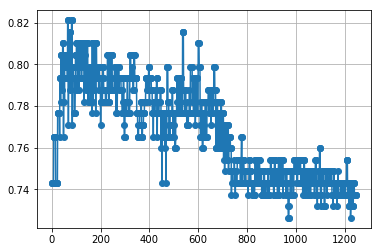

In [5]:
grafico_y = []
grafico_x = []
grafico_label_x = []
maior = [0, "", "", 0, -1.0]
ite = 0
for p1 in range(1, 40):
    for p2 in ['auto', 'ball_tree', 'kd_tree', 'brute']:
        for p3 in ['uniform', 'distance']:
            for p4 in range(20, 40, 5):
                model_test = KNeighborsClassifier(n_neighbors=p1, algorithm=p2, weights=p3, leaf_size=p4)
                model_test.fit(X[:tamTrain], y[:tamTrain])
                pred_test = model_test.predict(X[tamTrain:])
                accu = accuracy_score(pred_test, y[tamTrain:])
                grafico_y.append(accu)
                grafico_x.append(ite)
                grafico_label_x.append((p1, p2, p3, p4))            
                if(maior[4] < accu): maior = [p1, p2, p3, p4, accu]
                ite = ite + 1
                #print p1, p2, p3, p4, accu

print "Melhor: ", maior
#print grafico_label_x            
plt.plot(grafico_x, grafico_y, marker='o')
plt.grid()